In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# read the data
df = pd.read_csv('reddit_labelled_data.csv')
#excluded the na values from the dataset
df=df.dropna(subset=['Sentiment'])
df = df.dropna(subset=['cleaned_text'])
# ensured the type of Sentiment  column is integer

df['Sentiment'] = df['Sentiment'].astype(int)  # Convert to int after dropping NaN

print("Unique Sentiment values:", df['Sentiment'].unique())

df['Sentiment'] = df['Sentiment'].fillna(0)
X = df['cleaned_text']
y = df ['Sentiment']

df['Sentiment'] = df['Sentiment'].fillna(0).astype(int)
print(df['Sentiment'].unique())


# Initialize CountVectorizer (Bag of Words)
vectorizer = CountVectorizer(max_df=0.9,min_df=2,stop_words='english')
#vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(X)

# shuffled and split the data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X_tfidf,y,test_size=0.2,random_state=42 )

print("X:",X_train)
print("Y:",y_train)

# shape attribute is used  to contain the number of rows and column
print(X_train.shape, y_train.shape)
#X_train_dense = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())

# Combine features and labels into a single DataFrame
#combined_df = pd.concat([X_train_dense, y_train.reset_index(drop=True)], axis=1)

# Save to CSV
#combined_df.to_csv('X_y_train.csv', index=False)





Unique Sentiment values: [-1  0  1]
[-1  0  1]
X:   (0, 1555)	3
  (0, 2892)	1
  (0, 7825)	1
  (0, 6906)	4
  (0, 1742)	1
  (0, 11117)	1
  (0, 96)	4
  (0, 668)	1
  (0, 902)	3
  (0, 6151)	1
  (0, 10447)	4
  (0, 2636)	1
  (0, 10212)	1
  (0, 10550)	1
  (0, 6377)	1
  (0, 10163)	1
  (0, 5472)	3
  (0, 5291)	2
  (0, 3432)	1
  (0, 11342)	1
  (0, 9298)	1
  (0, 9941)	1
  (0, 3975)	1
  (0, 6247)	1
  (0, 9079)	1
  :	:
  (7379, 10862)	2
  (7379, 6552)	1
  (7379, 10442)	1
  (7379, 10215)	1
  (7379, 3904)	1
  (7379, 8047)	2
  (7379, 1898)	1
  (7379, 1739)	1
  (7379, 6027)	1
  (7379, 1175)	2
  (7379, 2784)	3
  (7379, 2000)	1
  (7379, 11154)	1
  (7379, 1753)	1
  (7379, 1743)	1
  (7379, 10093)	1
  (7379, 9075)	1
  (7379, 9052)	1
  (7379, 5021)	1
  (7379, 6137)	1
  (7379, 8587)	1
  (7379, 7833)	1
  (7379, 5285)	1
  (7379, 1396)	1
  (7379, 10378)	1
Y: 2922    0
6187    0
1324    0
5930    0
5047   -1
       ..
6101    0
5478    0
5713   -1
861     1
7753    0
Name: Sentiment, Length: 7380, dtype: int32
(738

In [25]:
from numpy import hstack
import numpy as np
def sigmoid(z):
    return 1/(1+np.exp(-z))
def cost_function(probability, actual):
    actual = np.array(actual)
    return (-actual*np.log(probability)-(1-actual)*np.log(1-probability)).mean()

def logistic_regression(X, y, num_iterations, learning_rate):
    intercept = np.ones((X.shape[0], 1))
    if hasattr(X, 'toarray'):
        X = X.toarray()  # converting sparse matrix to dense matrix

    # Reshape X to be 2D if it's 1D
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    
    X = np.concatenate((intercept, X), axis=1)  # Add intercept term
    
    # Weight initialization
    theta = np.zeros(X.shape[1])
    
    # To store loss and accuracy for plotting
    losses = []
    #accuracies = []
    
    for i in range(num_iterations):
        predictions = np.dot(X, theta)
        probability = sigmoid(predictions)
        
        # Gradient calculation
        gradient = np.dot(X.T, (probability - y)) / y.size
        theta = theta - learning_rate * gradient
        
        predictions = np.dot(X, theta)
        probability = sigmoid(predictions)
        # Loss calculation
        loss = cost_function(probability, y)
        print(f"Iteration {i}: Loss = {loss:.4f}")
        losses.append(loss)
        
        # Predict labels for accuracy calculation
        #pred_labels = predict(X, theta)
        #accuracy = (pred_labels == y)  # Compare predicted labels with actual labels
        #accuracies.append(accuracy.mean())   
        if i % 1000 == 0:
            print(f"Iteration {i}: Loss = {loss:.4f}")

    return theta, losses
def predict_probability(X, theta):
    intercept = np.ones((X.shape[0], 1))
    if hasattr(X, 'toarray'):
        X = X.toarray()  # Handle sparse matrix case
    
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    
    X = np.concatenate((intercept, X), axis=1)
    predictions = np.dot(X, theta)
    return sigmoid(predictions)

def predict(X, theta, threshold=0.5):
    
    return predict_probability(X,theta) >= threshold

In [26]:
# Training
theta,losses= logistic_regression(X_train, y_train, num_iterations=10000, learning_rate= 0.01)

y_pred = predict(X_test,theta)
accuracy = (y_pred == y_test)
print("Accuracy: ",accuracy.mean())

Iteration 0: Loss = 0.6607
Iteration 0: Loss = 0.6607
Iteration 1: Loss = 0.6317
Iteration 2: Loss = 0.6057
Iteration 3: Loss = 0.5822
Iteration 4: Loss = 0.5607
Iteration 5: Loss = 0.5409
Iteration 6: Loss = 0.5227
Iteration 7: Loss = 0.5057
Iteration 8: Loss = 0.4899
Iteration 9: Loss = 0.4750
Iteration 10: Loss = 0.4611
Iteration 11: Loss = 0.4480
Iteration 12: Loss = 0.4356
Iteration 13: Loss = 0.4238
Iteration 14: Loss = 0.4126
Iteration 15: Loss = 0.4020
Iteration 16: Loss = 0.3918
Iteration 17: Loss = 0.3821
Iteration 18: Loss = 0.3728
Iteration 19: Loss = 0.3639
Iteration 20: Loss = 0.3554
Iteration 21: Loss = 0.3472
Iteration 22: Loss = 0.3392
Iteration 23: Loss = 0.3316
Iteration 24: Loss = 0.3242
Iteration 25: Loss = 0.3171
Iteration 26: Loss = 0.3103
Iteration 27: Loss = 0.3036
Iteration 28: Loss = 0.2971
Iteration 29: Loss = 0.2909
Iteration 30: Loss = 0.2848
Iteration 31: Loss = 0.2789
Iteration 32: Loss = 0.2732
Iteration 33: Loss = 0.2676
Iteration 34: Loss = 0.2622
Ite

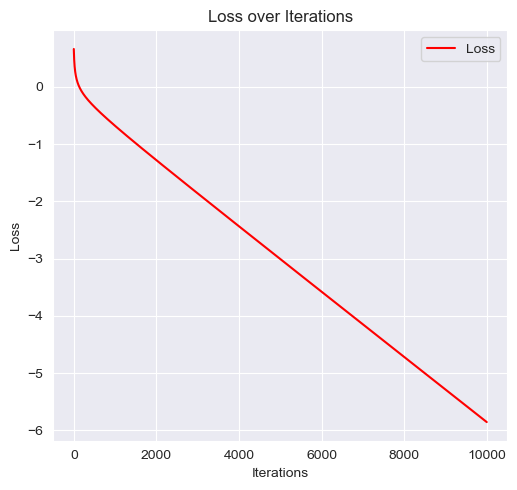

In [27]:

import matplotlib.pyplot as plt
# Plotting accuracy over iterations
plt.figure(figsize=(10, 5))

# Accuracy plot
'''plt.subplot(1, 2, 1)
plt.plot(range(len(accuracies)), accuracies, label='Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy over Iterations')
plt.legend()
'''
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(len(losses)), losses, label='Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
y_pred = predict(X_test,theta)
accuracy = (y_pred == y_test)
print("Accuracy: ",accuracy.mean())

'''print(theta.shape)
print(X_test.shape)
print(np.dot(theta.flatten(),X_test))'''

Accuracy:  1184     True
1039     True
9697    False
909      True
8972    False
        ...  
7896     True
1531    False
6363     True
7771     True
7970    False
Name: Sentiment, Length: 1845, dtype: bool


'print(theta.shape)\nprint(X_test.shape)\nprint(np.dot(theta.flatten(),X_test))'